In [12]:
import pandas as pd
import os
from functions_georgai import visualise_data, average_data
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as Dataset
from global_land_mask import globe

def generate_box(lat, lon, resolution):
    """
    Generate the coordinates of the corners of a box around a given point
    with a specified distance.
    """
    distance=resolution/2
    # Calculate the coordinates of the corners of the box
    top_lat = lat + distance
    bottom_lat = lat - distance
    left_lon = lon - distance
    right_lon = lon + distance
    
    return [
        (top_lat, left_lon), (top_lat, right_lon), (bottom_lat, right_lon), (bottom_lat, left_lon),
        (top_lat, lon), (bottom_lat, lon), (lat, right_lon), (lat, left_lon)
    ]

def is_over_land(lat,lon,resolution):
    distance=resolution/2
    
    over_land=False
    
    coordinates=generate_box(lat,lon,resolution)
    
    #print(lat_ur,lon_ur)
    for coordinate in coordinates:
        if globe.is_land(coordinate[0],coordinate[1]):
            over_land=True
        
    return over_land

def apply_land_mask(df,resolution):
    df['over_land'] = df.apply(lambda row: is_over_land(row['latitude'], row['longitude'],resolution), axis=1)
    
    df_masked=df[df["over_land"]==True]
    
    return df_masked

os.getcwd()

'/home/asanche5/Desktop/data_sinc/repositories/KOIOS/dev/KOIOS_meeting_20240226'

In [6]:
data_ip=pd.read_csv('/home/asanche5/Desktop/data_sinc/KOIOS_IP_run/full_predictions_IP_2015_2021.csv')

In [7]:
data_ip_1=data_ip.loc[data_ip["Convective_Event"]==1]

data_ip_1["probability"].mean()
#data_ip["probability"].mean()

0.21150328430284696

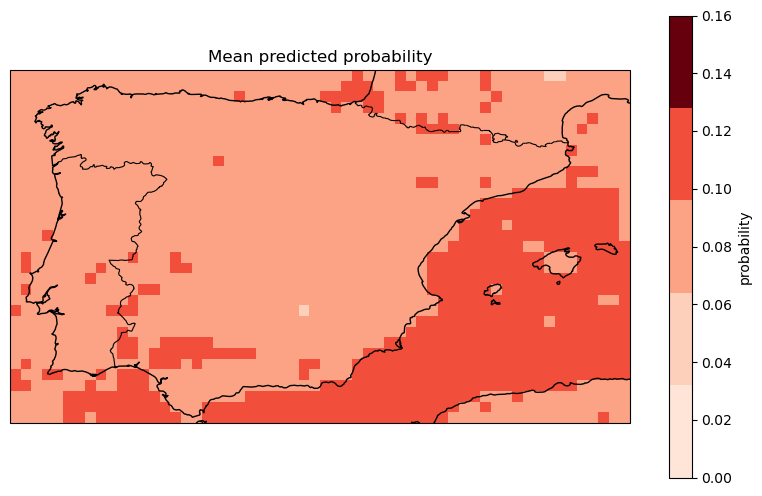

In [8]:
variable = "probability"
location="Iberian Peninsula"

data_mean,data_max, data_median, data_sum=average_data(data_ip,variable)
fig1,ax1, data=visualise_data(data_mean,"Mean predicted probability",variable,vmin=-0.0,vmax=0.16,binary=False,figsize=(10,6))
#fig1,ax1=add_US_features(fig1,ax1)
#plt.savefig("outputs/1.png",dpi=300,bbox_inches="tight")
#images.append("outputs/1.png")

In [9]:
data_ip

,day,year,month,latitude,longitude,Convective_Event,probability,date
0,1,2015,3,36.0,-9.75,0.0,0.000461,2015-03-01
1,1,2015,3,36.0,-9.50,0.0,0.000306,2015-03-01
2,1,2015,3,36.0,-9.25,0.0,0.000340,2015-03-01
3,1,2015,3,36.0,-9.00,0.0,0.000572,2015-03-01
4,1,2015,3,36.0,-8.75,0.0,0.000727,2015-03-01
...,...,...,...,...,...,...,...,...
2449999,30,2020,9,44.0,3.50,0.0,0.000917,2020-09-30
2450000,30,2020,9,44.0,3.75,0.0,0.000221,2020-09-30
2450001,30,2020,9,44.0,4.00,0.0,0.000625,2020-09-30
2450002,30,2020,9,44.0,4.25,0.0,0.000744,2020-09-30


In [93]:
threshold=0.1
data_ip['prediction'] = data_ip['probability'].apply(lambda x: 1 if x > threshold else 0)

data_ip_1=data_ip.loc[data_ip["Convective_Event"]==1]
data_ip_0=data_ip.loc[data_ip["Convective_Event"]==0]

tp=len(data_ip.loc[(data_ip["prediction"]==1) & (data_ip["Convective_Event"]==1)])
fp=len(data_ip.loc[(data_ip["prediction"]==1) & (data_ip["Convective_Event"]==0)])
tn=len(data_ip.loc[(data_ip["prediction"]==0) & (data_ip["Convective_Event"]==0)])
fn=len(data_ip.loc[(data_ip["prediction"]==0) & (data_ip["Convective_Event"]==1)])

n_1=len(data_ip_1)
n_0=len(data_ip_0)

print(data_ip_0["probability"].median())
print(data_ip_1["probability"].median())

print("Fraction of events detected: ")
print(tp/n_1)

print("Fraction of false positives over total non event days: ")
print(fp/n_0)

0.0056051463
0.11677279
Fraction of events detected: 
0.5443037974683544
Fraction of false positives over total non event days: 
0.17522553881268285


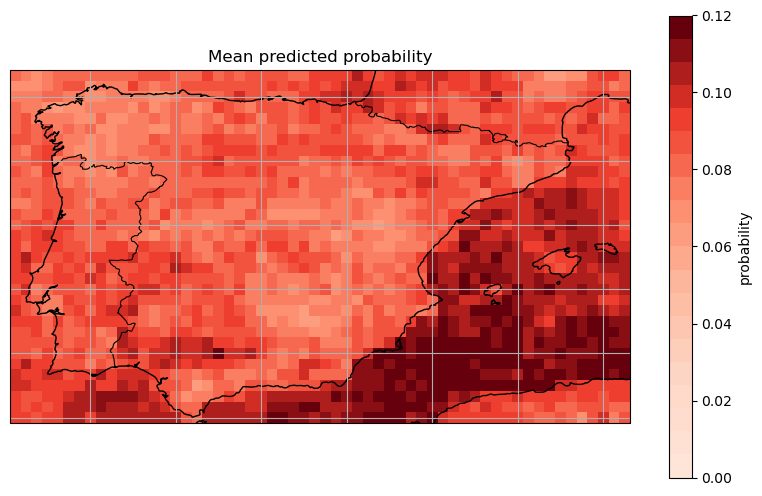

In [52]:
variable = "probability"
location="Iberian Peninsula"

data_mean,data_max, data_median, data_sum=average_data(data_ip,variable)
fig1,ax1, data=visualise_data(data_mean,"Mean predicted probability",variable,cmap_steps=20,vmin=0.0,vmax=0.12,binary=False,figsize=(10,6))
#fig1,ax1=add_US_features(fig1,ax1)
#plt.savefig("outputs/1.png",dpi=300,bbox_inches="tight")
#images.append("outputs/1.png")

(array([9.02186421, 4.3981588 , 3.55235903, 3.55235903, 2.0863061 ,
        2.70655926, 2.42462601, 1.52243959, 0.95857307, 0.90218642,
        1.12773303, 1.40966628, 0.95857307, 0.73302647, 0.62025316,
        1.07134638, 0.78941312, 1.24050633, 0.56386651, 0.39470656,
        0.39470656, 0.56386651, 0.33831991, 0.56386651, 0.67663982,
        0.        , 0.95857307, 0.28193326, 0.56386651, 0.56386651,
        0.16915995, 0.22554661, 0.50747986, 0.1127733 , 0.1127733 ,
        0.22554661, 0.67663982, 0.1127733 , 0.22554661, 0.33831991,
        0.33831991, 0.1127733 , 0.05638665, 0.16915995, 0.        ,
        0.16915995, 0.22554661, 0.1127733 , 0.16915995]),
 array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
        0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
        0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
        0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
        0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.

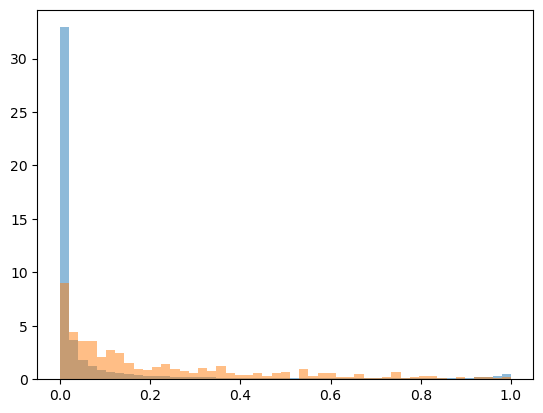

In [43]:
bins=np.linspace(0,1,50)
plt.hist(data_ip_0["probability"],bins=bins,density=True,alpha=0.5)
plt.hist(data_ip_1["probability"],bins=bins,density=True,alpha=0.5)

/home/asanche5/Desktop/data_sinc/repositories/KOIOS/dev/KOIOS_meeting_20240226/functions_georgai.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = data.groupby(['latitude', 'longitude']).cumcount()


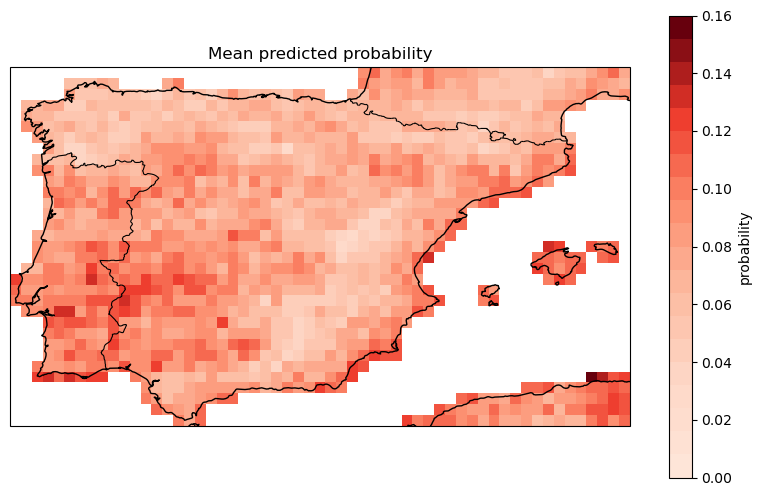

In [22]:
data_ip_monthly=data_ip.drop(columns=["day","year","date"]).groupby(["month","latitude","longitude"]).mean().reset_index()
data_ip_month=data_ip_monthly.loc[data_ip_monthly["month"]==9].drop(columns="month")
data_ip_month_masked=apply_land_mask(data_ip_month,0.25)

fig1,ax1, data=visualise_data(data_ip_month_masked,"Mean predicted probability","probability",cmap_steps=20,vmin=0.0,vmax=0.16,binary=False,figsize=(10,6))


In [102]:
data_test=Dataset.Dataset("/home/asanche5/Desktop/data_sinc/data/koios_ip/b4560bb/ERA5_IP_single_levels/ERA5_IP_single_levels_2015.nc")

In [103]:
data_test.variables.keys()

dict_keys(['longitude', 'latitude', 'time', 'fg10', 'isor', 'blh', 'cape', 'cin', 'cp', 'crr', 'kx', 'ptype', 'sdor', 'sp', 'tciw', 'tclw', 'tcslw', 'totalx', 'p80.162', 'p79.162', 'deg0l'])

In [105]:
data_parquet=pd.read_parquet("/home/asanche5/Desktop/data_sinc/data/merged/US/dev_alberto/INTERIM/PROCESSED/US/merged_US_dataset.parquet")

In [108]:
data_parquet.columns

Index(['latitude', 'longitude', 'year', 'month', 'day', 'fg10_mean',
       'fg10_min', 'fg10_max', 'isor_mean', 'isor_min', 'isor_max', 'blh_mean',
       'blh_min', 'blh_max', 'cape_mean', 'cape_min', 'cape_max', 'cp_mean',
       'cp_min', 'cp_max', 'crr_mean', 'crr_min', 'crr_max', 'kx_mean',
       'kx_min', 'kx_max', 'ptype_mean', 'ptype_min', 'ptype_max', 'sdor_mean',
       'sdor_min', 'sdor_max', 'sp_mean', 'sp_min', 'sp_max', 'tciw_mean',
       'tciw_min', 'tciw_max', 'tclw_mean', 'tclw_min', 'tclw_max',
       'tcslw_mean', 'tcslw_min', 'tcslw_max', 'totalx_mean', 'totalx_min',
       'totalx_max', 'p80.162_mean', 'p80.162_min', 'p80.162_max',
       'p79.162_mean', 'p79.162_min', 'p79.162_max', 'deg0l_mean', 'deg0l_min',
       'deg0l_max', 'd_mean', 'd_min', 'd_max', 'z_mean', 'z_min', 'z_max',
       'pv_mean', 'pv_min', 'pv_max', 'r_mean', 'r_min', 'r_max', 'ciwc_mean',
       'ciwc_min', 'ciwc_max', 'q_mean', 'q_min', 'q_max', 't_mean', 't_min',
       't_max', 'u_mean

In [135]:
data_ip_month

,latitude,longitude,Convective_Event,probability,threshold_column,prediction,over_land
7656,36.0,-9.75,0.0,0.124838,0.258065,0.258065,True
7657,36.0,-9.50,0.0,0.128027,0.258065,0.258065,True
7658,36.0,-9.25,0.0,0.119666,0.258065,0.258065,True
7659,36.0,-9.00,0.0,0.137504,0.281081,0.281081,True
7660,36.0,-8.75,0.0,0.133203,0.295699,0.295699,True
...,...,...,...,...,...,...,...
9565,44.0,3.50,0.0,0.066692,0.113514,0.113514,True
9566,44.0,3.75,0.0,0.087866,0.150538,0.150538,True
9567,44.0,4.00,0.0,0.095146,0.168478,0.168478,True
9568,44.0,4.25,0.0,0.091627,0.204301,0.204301,True


In [166]:
from mpl_toolkits.basemap import Basemap
bm = Basemap(
  area_thresh=10,
  resolution="l",
  llcrnrlon=0.,
  llcrnrlat=-80.,
  urcrnrlon=360,
  urcrnrlat=80
) # default: projection='cyl'
print(bm.is_land(99.675, 13.104))  #True
print(bm.is_land(100.539, 13.104))  #False


True
False


In [190]:


data_ip_month_masked=apply_land_mask(data_ip_month,0.25)
data_ip_month_masked

,latitude,longitude,Convective_Event,probability,threshold_column,prediction,over_land
9586,36.0,-5.75,0.0,0.077021,0.145161,0.145161,True
9587,36.0,-5.50,0.0,0.071019,0.161290,0.161290,True
9588,36.0,-5.25,0.0,0.103573,0.215054,0.215054,True
9607,36.0,-0.50,0.0,0.129596,0.318919,0.318919,True
9608,36.0,-0.25,0.0,0.129876,0.290323,0.290323,True
...,...,...,...,...,...,...,...
11479,44.0,3.50,0.0,0.084376,0.150538,0.150538,True
11480,44.0,3.75,0.0,0.112810,0.188172,0.188172,True
11481,44.0,4.00,0.0,0.103842,0.198925,0.198925,True
11482,44.0,4.25,0.0,0.101451,0.237838,0.237838,True


In [ ]:
is_land(40.8,-3.7)

In [144]:
import cartopy.io.shapereader as shapereader
import shapely.geometry as sgeom

MAP_RES  = '110m'
MAP_TYPE = 'physical'
MAP_NAME = 'land'

shape_data = shapereader.natural_earth(resolution=MAP_RES, category=MAP_TYPE, name=MAP_NAME)
lands = shapereader.Reader(shape_data).geometries()

# Check if a point is over land.
def is_land(lat, lon):
    for land in lands:
        if land.contains(sgeom.Point(lon, lat)): return True

    # If it wasn't found, return False.
    return False

In [171]:
bm = Basemap(
  area_thresh=10,
  resolution="l",
  llcrnrlon=0.,
  llcrnrlat=-80.,
  urcrnrlon=360,
  urcrnrlat=80
)

x,y=bm(4,5)

In [173]:
from global_land_mask import globe
print(globe.is_land(49.22, -2.23))

True


In [174]:
print(globe.is_land(49.22, -2.23))

True


In [189]:

lista=generate_box(45,0,0.25)
for element in lista:
    print(element[0])

45.125
45.125
44.875
44.875
45.125
44.875
45
45
